In [2]:
#from matplotlib import cm,colors
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("商业图表_堆积柱形图.csv", engine='python', index_col=0)
meanRow_df = df.apply(lambda x: x.mean(), axis=0)
Sing_df = meanRow_df.sort_values(ascending=False).index

display(df, meanRow_df, Sing_df)

,Latin America,"Central Europe,\nMiddle East, Africa",Western Europe,North America,Asia-Pacific
year,,,,,
2011,10,20,45,95,80
2012,30,50,65,120,160
2013,60,70,80,120,160
2014,170,190,230,500,750
2015,200,300,400,500,1300


Latin America                            94.0
Central Europe,\nMiddle East, Africa    126.0
Western Europe                          164.0
North America                           267.0
Asia-Pacific                            490.0
dtype: float64

Index(['Asia-Pacific', 'North America', 'Western Europe',
       'Central Europe,\nMiddle East, Africa', 'Latin America'],
      dtype='object')

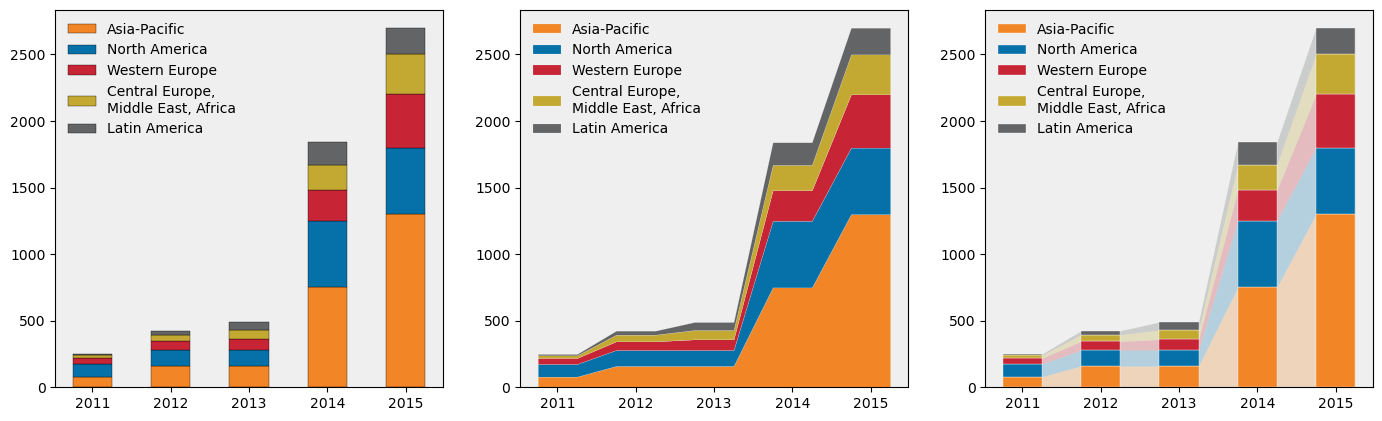

<Figure size 500x500 with 0 Axes>

In [32]:
n_row, n_col = df.shape
x_value = np.arange(n_row)
colors = ["#F28526", "#0671A8", "#C72435", "#C3A932", "#636466"]
width = 0.5
# ===================================== (a)堆积柱形图====================================================
fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(17,5),dpi=100)
bottom_y=np.zeros(n_row)
for i in range(n_row):
    label=Sing_df[i]
    ax1.bar(x_value,df.loc[:,label],bottom=bottom_y,width=width,color=colors[i],label=label,edgecolor='k', linewidth=0.25)
    bottom_y=bottom_y+df.loc[:,label].values
ax1.set_xticks(x_value)
ax1.set_xticklabels(df.index)
ax1.legend(frameon=False)
# plt.savefig('商业图表_堆积柱形图1.pdf',bbox_inches='tight', pad_inches=0.3)


# ======================================= (b)堆积面积图.==================================================
x = []
for i in range(n_row):
    x = x+[i-width/2, i, i+width/2]
df_area = pd.DataFrame(index=x)

for j in list(range(n_col))[::-1]:
    y = []
    for i in range(n_row):
        y = y+np.repeat(df.iloc[i, j], 3).tolist()
    df_area[df.columns[j]] = y

ax2.stackplot(df_area.index.values, df_area.values.T,colors=colors,labels=Sing_df,linewidth=0.1,edgecolor ='w',alpha=1)
ax2.set_xticks(x_value)
ax2.set_xticklabels(df.index)
ax2.legend(loc="upper left", frameon=False)
# plt.savefig('商业图表_堆积柱形图2.pdf',bbox_inches='tight', pad_inches=0.3)


fig=plt.figure(figsize=(5,5),dpi=100)
ax3.stackplot(df_area.index.values, df_area.values.T,colors=colors,linewidth=0.1,edgecolor ='w',alpha=0.25)
bottom_y=np.zeros(n_row)
for i in range(n_row):
    label=Sing_df[i]
    ax3.bar(x_value,df.loc[:,label],bottom=bottom_y,width=width,color=colors[i],label=label,edgecolor='w', linewidth=0.25)
    bottom_y=bottom_y+df.loc[:,label].values
ax3.set_xticks(x_value)
ax3.set_xticklabels(df.index)
ax3.legend(ncol=1,frameon=False)
# plt.savefig('商业图表_堆积柱形图3.pdf',bbox_inches='tight', pad_inches=0.3)

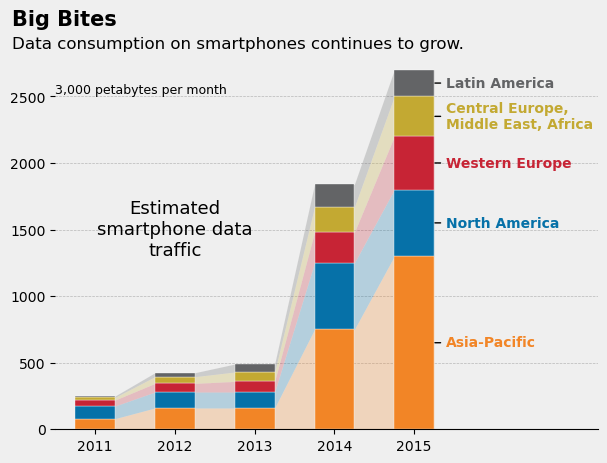

In [6]:
# ==================================(c)组合图.=======================================================
plt.rc('axes', axisbelow=True)
plt.rcParams['axes.facecolor'] = '#EFEFEF'
plt.rcParams['savefig.facecolor'] = '#EFEFEF'


fig = plt.figure(figsize=(7, 5), dpi=100, facecolor='#EFEFEF')

plt.stackplot(df_area.index.values, df_area.values.T,
              colors=colors, linewidth=0.1, edgecolor='w', alpha=0.25)
bottom_y = np.zeros(n_row)
for i in range(n_row):
    label = Sing_df[i]
    plt.bar(x_value, df.loc[:, label], bottom=bottom_y, width=width,
            color=colors[i], label=label, edgecolor='w', linewidth=0.25)

    # plt.text(x=x_value[-1]*1.1,y=bottom_y[-1]+df.loc[:,label].values[-1]/2,s=label,verticalalignment='center')
    plt.annotate(s=label, xy=(x_value[-1]+width/2*0.9, bottom_y[-1]+df.loc[:, label].values[-1]/2),
                 xytext=(x_value[-1]*1.1, bottom_y[-1]+df.loc[:, label].values[-1]/2), color=colors[i],
                 arrowprops=dict(facecolor='gray', arrowstyle='-'), verticalalignment='center', weight='bold')

    bottom_y = bottom_y+df.loc[:, label].values
plt.xlim(-0.5, 6.3)
plt.xticks(x_value, df.index, size=10)  # 设置x轴刻度

plt.grid(which='major', axis="y", linestyle='--',
         linewidth='0.5', color='gray', alpha=0.5)

ax = plt.gca()  # 删除左边和顶部的绘图区域边框线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')

plt.text(-0.5, 2500, s='3,000 petabytes per month',
         weight='light', size=9, verticalalignment='bottom')
plt.text(1, 1500, s='Estimated\nsmartphone data\ntraffic', weight='light',
         size=13, verticalalignment='center', horizontalalignment='center')

plt.text(-0.08, 1.07, s='Big Bites',
         transform=ax.transAxes, weight='bold', size=15)
plt.text(-0.08, 1.01, s='Data consumption on smartphones continues to grow.',
         transform=ax.transAxes, weight='light', size=12)

#plt.savefig('商业图表_堆积柱形图.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()
